In [144]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

import statsmodels.api as sm

In [98]:
x = np.linspace(-10, 10, 100)
X = np.column_stack([x])
beta = np.array([1, 1])
e = np.random.normal(size=100)

X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [104]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
ssr = results.ssr

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     3004.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           2.48e-75
Time:                        17:13:36   Log-Likelihood:                -147.55
No. Observations:                 100   AIC:                             299.1
Df Residuals:                      98   BIC:                             304.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8660      0.107      8.102      0.0

In [100]:
@np.vectorize
def obj(b1,b2):
    yy=np.dot(X, [b1,b2])
    return ((y-yy)**2).sum()

In [129]:
ext=[0.7,1.1]
xx = np.linspace(*ext,200)
yy = xx

mx, my = np.meshgrid(xx, yy)
mz = obj(mx,my)

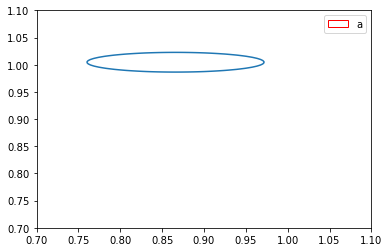

In [154]:

cs = plt.contour(mx,my,mz,levels=[ssr*1.01],colors='C0')
cs.collections[0].set_label('asd')


ell=patches.Ellipse((0,0),1,1,fill=False, edgecolor='red')
plt.legend([ell],['a'])